## Install package
https://github.com/albermax/innvestigate

In [1]:
!pip install innvestigate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import modules

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend
import innvestigate

import matplotlib.pyplot as plt
import cv2
import numpy as np

tf.compat.v1.disable_eager_execution()

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

### Load model

In [30]:
model = VGG16(weights='imagenet')

In [31]:
model_wo_softmax = innvestigate.model_wo_softmax(model)

### Load LRP analyzer

In [52]:
from innvestigate.analyzer import LRP
analyzer = LRP(
    model_wo_softmax,
    rule="ZPlus",
    input_layer_rule="Bounded",
    until_layer_idx=5,
    until_layer_rule="ZPlus",
    bn_layer_rule="ZPlus"
)

### Load image

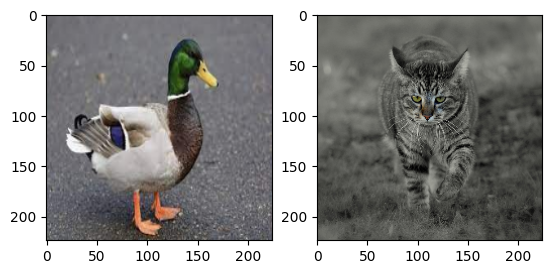

In [80]:
images = []

image_cat = cv2.imread('/content/sample_data/cat.JPEG')
image_cat = cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)

image = cv2.imread('/content/sample_data/duck.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (224,224))
image_cat = cv2.resize(image_cat, (224,224))

images.append(image)
images.append(image_cat)

plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image_cat)
plt.show()

### Preprocess images

In [81]:
image_tensors = []

for i in images:
  image_tensor = tf.convert_to_tensor(preprocess_input(i))
  image_tensor = tf.expand_dims(image_tensor, 0)
  image_tensors.append(image_tensor)
  print(image_tensor.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


### Run LRP analyzer

In [83]:
analysis = []
for i in image_tensors:
  a = analyzer.analyze(i)
  analysis.append(a)

In [84]:
import innvestigate.utils as iutils
import innvestigate.utils.visualizations as ivis

color_conversion = "BGRtoRGB"
# Handle input depending on model and backend.
channels_first = keras.backend.image_data_format() == "channels_first"

In [85]:
def heatmap(X):
    # X = ivis.gamma(X, minamp=0, gamma=0.95)
    return ivis.heatmap(X)

In [86]:
def postprocess(X, color_conversion, channels_first):
    X = X.copy()
    X = iutils.postprocess_images(
        X, color_coding=color_conversion, channels_first=channels_first
    )
    return X

In [87]:
results = []
for i in analysis:
  result = postprocess(i, color_conversion, channels_first)
  results.append(result)

### LRP Result

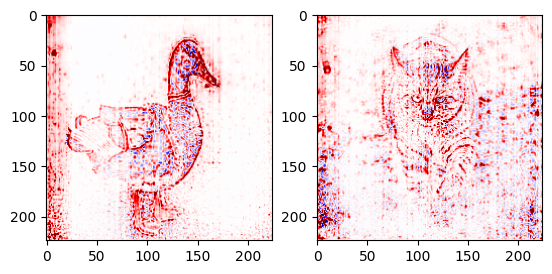

In [88]:
plt.subplot(121)
plt.imshow(heatmap(results[0][0]))
plt.subplot(122)
plt.imshow(heatmap(results[1][0]))
plt.show()